In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## GSI's Defense ##

In [2]:
scores = Table.read_table('scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [4]:
scores.group("Section", np.average).show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [6]:
scores.group("Section")

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [10]:
random_sample = scores.sample(27, with_replacement=False)
random_sample

Section,Midterm
3,11
2,15
1,21
3,20
1,25
8,17
3,15
11,18
9,11
5,16


In [11]:
np.average(random_sample.column("Midterm"))

16.555555555555557

In [12]:
def random_sample_average():
    random_sample = scores.sample(27, with_replacement=False)
    return np.average(random_sample.column('Midterm'))

In [13]:
sample_averages = make_array()

for i in np.arange(50000):
    one_average = random_sample_average()
    sample_averages = np.append(sample_averages, one_average)

In [16]:
observed_average = 13.6667

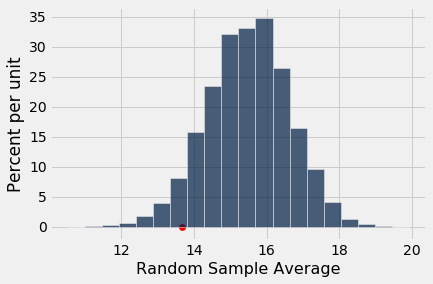

In [17]:
averages_tbl = Table().with_column('Random Sample Average', sample_averages)
averages_tbl.hist(bins = 20)
# You are not responsible for this code
plots.scatter(observed_average, 0, color = 'red', s=40);

In [18]:
np.count_nonzero(sample_averages <= observed_average)/len(sample_averages)

0.05802

In [19]:
# 5% of 500000 is 2500
five_percent_point = averages_tbl.sort(0).column(0).item(2500)
five_percent_point

13.592592592592593

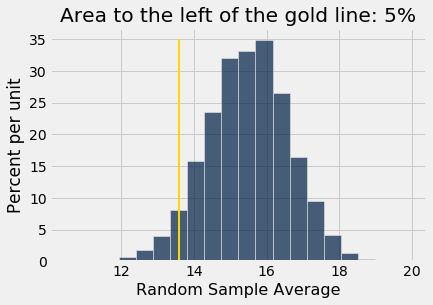

In [20]:
averages_tbl.hist(bins = 20)
plots.plot([five_percent_point, five_percent_point], [0, 0.35], color='gold', lw=2)
plots.title('Area to the left of the gold line: 5%');